# Learn about the training dataset

In [50]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [51]:
def plot_samples(dataframe, num_of_samples):
    samples = dataframe.iloc[:num_of_samples]
    x = np.arange(0,samples.shape[1])
    plt.figure(figsize=(20,10))
    plt.plot(x, samples.T.values)


In [52]:
hourly_df = pd.read_csv('Train/Hourly-train.csv', header=0, index_col=0)
hourly_df.head()


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
V1,,,,,,,,,,,,,,,,,,,,,
H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,1713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,1108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,4227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,2275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(414, 960)


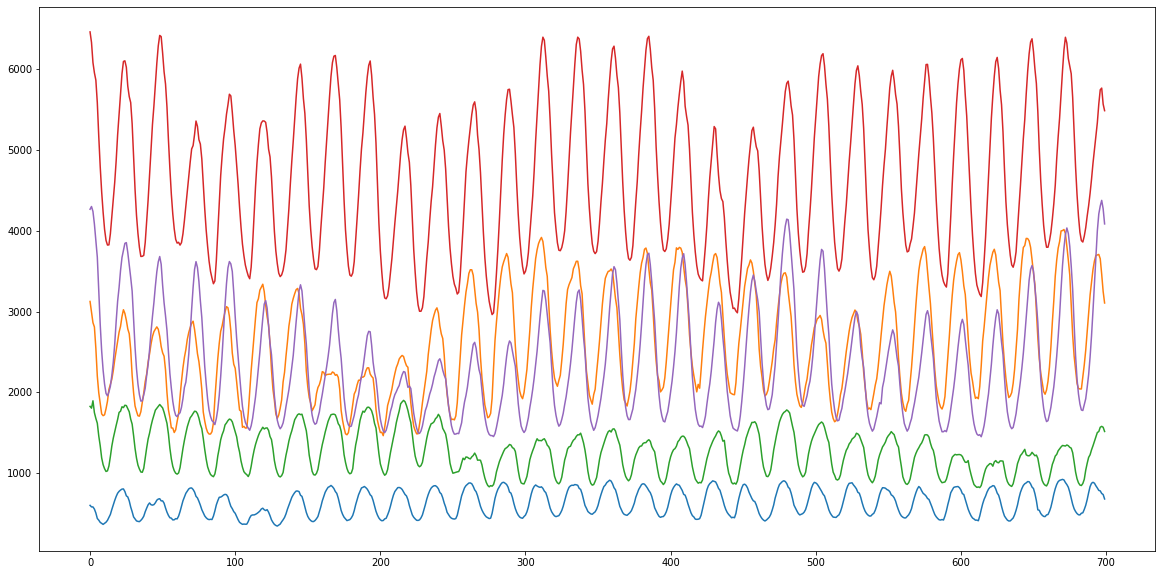

In [53]:
print(hourly_df.shape)
plot_samples(hourly_df, 5)

# learn more about the test dataset

In [54]:
hourly_df_test = pd.read_csv('Test/Hourly-test.csv', header=0, index_col=0)
hourly_df_test.head()


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
V1,,,,,,,,,,,,,,,,,,,,,
H1,619.0,565.0,532.0,495.0,481.0,467.0,473.0,488.0,501.0,534.0,...,812.0,836.0,838.0,829.0,807.0,785.0,756.0,719.0,703.0,659.0
H2,2771.0,2396.0,2189.0,1984.0,1872.0,1843.0,1828.0,1872.0,1952.0,2069.0,...,3018.0,3206.0,3356.0,3499.0,3550.0,3558.0,3488.0,3224.0,3054.0,2918.0
H3,1455.0,1376.0,1235.0,1101.0,1003.0,943.0,905.0,886.0,910.0,970.0,...,1457.0,1529.0,1627.0,1701.0,1754.0,1791.0,1819.0,1791.0,1758.0,1679.0
H4,5327.0,5051.0,4683.0,4319.0,4049.0,3847.0,3712.0,3639.0,3652.0,3758.0,...,5337.0,5675.0,5926.0,6159.0,6313.0,6072.0,5612.0,5220.0,4895.0,4793.0
H5,3823.0,3501.0,3039.0,2613.0,2312.0,2079.0,1938.0,1839.0,1821.0,1877.0,...,2345.0,2529.0,2737.0,3028.0,3292.0,3453.0,3574.0,3522.0,3338.0,3041.0


(414, 48)


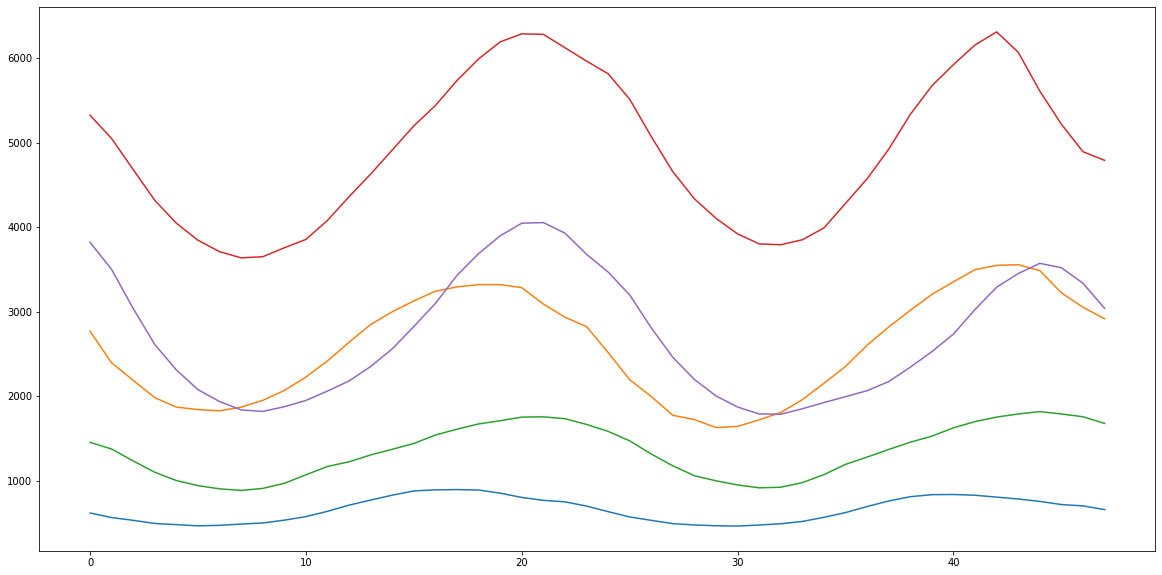

In [55]:
print(hourly_df_test.shape)
plot_samples(hourly_df_test, 5)


# Preprocessing
https://www.tensorflow.org/tutorials/structured_data/time_series

In [64]:
dataset = hourly_df.values


In [65]:
TESTSET_HORIZION = hourly_df_test.shape[1]
TESTSET_HORIZION

48

In [67]:
samples_num, TRAINSET_LOOKUP = dataset.shape
TRAIN_SPLIT = int(0.75 * samples_num)
samples_num, TRAIN_SPLIT

(414, 310)

# Standardize timesteps by removing the mean and scaling to unit variance

In [68]:
def standardize(train_dataset):
    scaler = StandardScaler()
    scaler.fit(train_dataset)
    standardized_train_dataset = scaler.transform(train_dataset)
    
    return standardized_train_dataset


std_dataset = standardize(dataset)


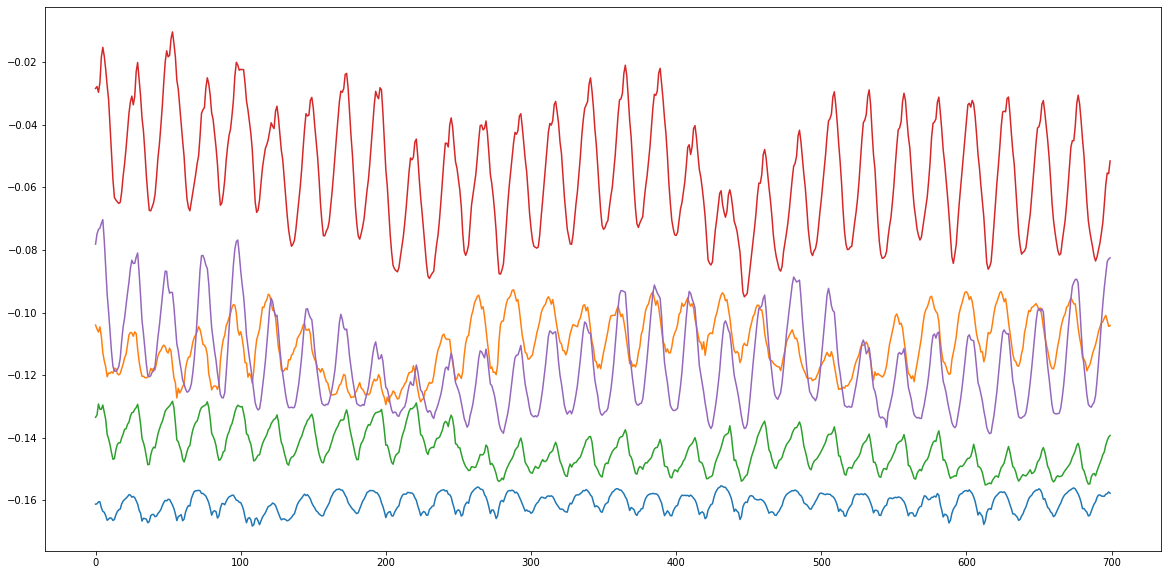

In [69]:

# Draw Five samples

samples = std_dataset
x = np.arange(0,samples.shape[1])
plt.figure(figsize=(20,10))
plt.plot(x, samples[0])
plt.plot(x, samples[1])
plt.plot(x, samples[2])
plt.plot(x, samples[3])
plt.plot(x, samples[4])



# Crop dataset to get rid of Nan values

In [70]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)


In [71]:
from numpy import *
# get the indecis of the nan values
where_are_NaNs = np.isnan(dataset)
argmax_index = np.argmax(where_are_NaNs)
print(argmax_index)


# crop dataset
dataset = dataset[:,:argmax_index]

# replace the left nan values with zeros
dataset[where_are_NaNs] = 0

# standardize the samples
std_dataset_no_nan = standardize(dataset)

# shuffel rows
shuffle_along_axis(std_dataset_no_nan, axis=0)

print(std_dataset_no_nan.shape)



700


IndexError: boolean index did not match indexed array along dimension 1; dimension is 700 but corresponding boolean dimension is 960

In [72]:
TRAINSET_LOOK_BACK = std_dataset_no_nan.shape[1] - TESTSET_HORIZION
TRAINSET_LOOK_BACK

652

# Split dataset

In [73]:
train_dataset = std_dataset_no_nan[0:TRAIN_SPLIT, :]
val_dataset = std_dataset_no_nan[TRAIN_SPLIT:, :]

print(std_dataset_no_nan.shape)
print(train_dataset.shape)
print(val_dataset.shape)


(414, 700)
(310, 700)
(104, 700)


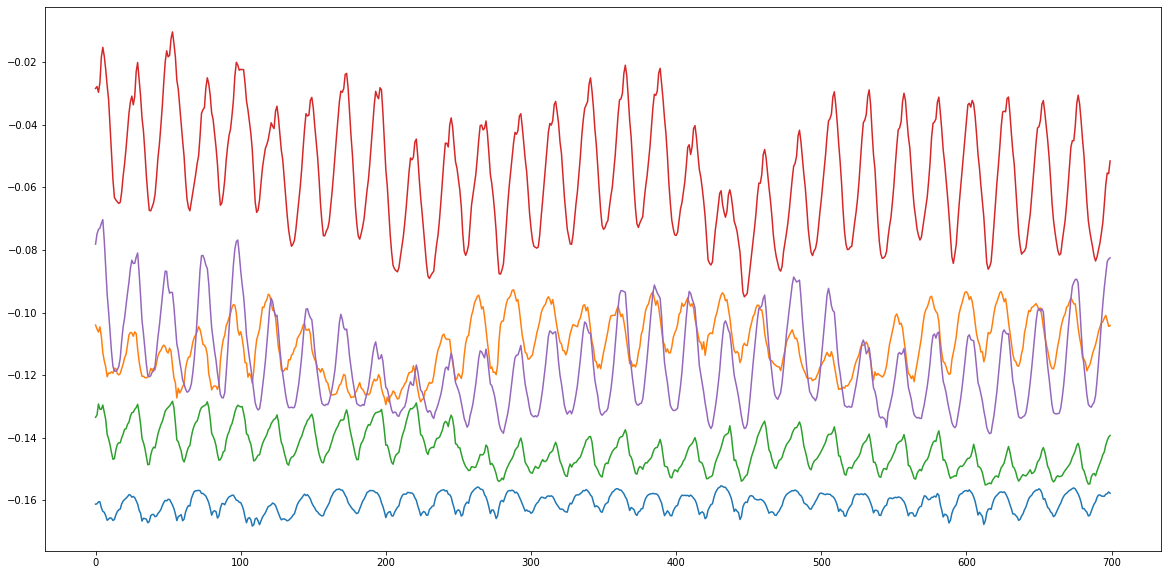

In [74]:

# Draw Five samples
samples = std_dataset_no_nan
x = np.arange(0,samples.shape[1])
plt.figure(figsize=(20,10))
plt.plot(x, samples[0])
plt.plot(x, samples[1])
plt.plot(x, samples[2])
plt.plot(x, samples[3])
plt.plot(x, samples[4])


# Split to X and Y

In [106]:

def univariate_data(dataset, start_index, end_index):
    data = []
    labels = []

    data   = dataset[:, start_index:end_index]
    labels = dataset[:, end_index:]
    
    return np.array(data), np.array(labels)

    
x_train_uni, y_train_uni = univariate_data(train_dataset, 0, TRAINSET_LOOK_BACK)
x_val_uni, y_val_uni     = univariate_data(val_dataset, 0, TRAINSET_LOOK_BACK)

print('Train')
print(x_train_uni.shape)
print(y_train_uni.shape)

print('Val')         
print(x_val_uni.shape)
print(y_val_uni.shape)  

# print ('Single window of past history')
# print (x_train_uni[0])
# print ('\n Target audience size to predict')
# print (y_train_uni[0])


Train
(310, 652)
(310, 48)
Val
(104, 652)
(104, 48)


In [107]:
BATCH_SIZE = 25
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()


In [108]:
def create_time_steps(length, start):
    time_steps = []
    for i in range(start, length + start):
        time_steps.append(i)
        
    return time_steps

def show_plot(history, future, model_prediction,title):
    time_steps_history = create_time_steps(history.shape[0] ,start=0)
    time_steps_future  = create_time_steps(future.shape[0] , start=history.shape[0])
    time_steps_pred    = create_time_steps(model_prediction.shape[0] , start=history.shape[0])

    plt.figure(figsize=(20,10))
    plt.title(title)
    
    plt.plot(time_steps_history, history, '-', markersize=10, color = 'blue', label='History')
    plt.plot(time_steps_future , future , '-', markersize=10, color = 'red' , label='True Future')
    plt.plot(time_steps_pred, model_prediction, '-', markersize=10, color = 'green', label='Model Prediction')

    plt.legend()
    plt.xlabel('Time-Step')
    plt.ylabel('Audience Size')
    
    return plt

<module 'matplotlib.pyplot' from '/anaconda2/envs/awtpy3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

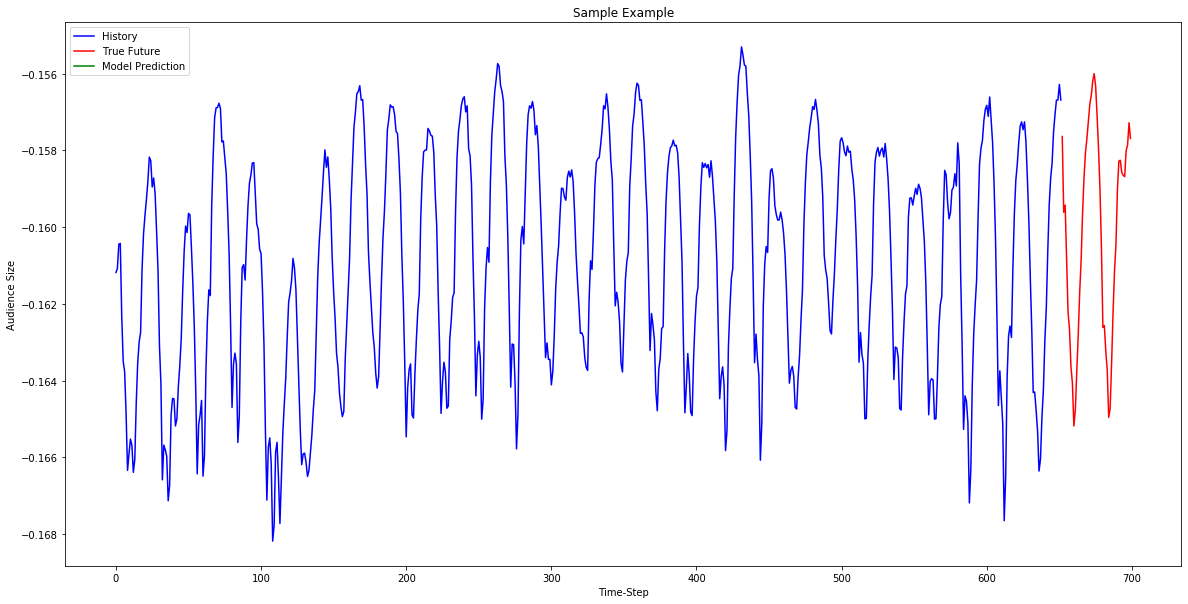

In [109]:

show_plot(x_train_uni[0], y_train_uni[0], np.array([]), 'Sample Example')


In [110]:
print(x_train_uni.shape)
print(y_train_uni.shape)

timesteps, data_dim = TRAINSET_LOOK_BACK, 1

multi_step_model = tf.keras.models.Sequential()

multi_step_model.add(tf.keras.layers.LSTM(80, input_shape=(timesteps, data_dim), activation='tanh'))

#multi_step_model.add(tf.keras.layers.LSTM(1, activation='relu'))
                     
multi_step_model.add(tf.keras.layers.Dense(TESTSET_HORIZION))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3, clipvalue=1.0),
                         loss='mae', 
                         metrics=['accuracy'])

multi_step_model.summary()

(310, 652)
(310, 48)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 80)                26240     
_________________________________________________________________
dense_4 (Dense)              (None, 48)                3888      
Total params: 30,128
Trainable params: 30,128
Non-trainable params: 0
_________________________________________________________________


In [111]:
from tensorflow import keras

EPOCHS = 7
EVALUATION_INTERVAL=int(np.floor(len(x_train_uni)+len(x_val_uni) / float(BATCH_SIZE)))
print(EVALUATION_INTERVAL)

print(x_train_uni.shape) #(310, 1, 480)

rx_train_uni = x_train_uni.reshape(x_train_uni.shape[0], x_train_uni.shape[1] , 1)
rx_val_uni = x_val_uni.reshape(x_val_uni.shape[0], x_val_uni.shape[1] , 1)


314
(310, 652)


In [ ]:


# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

multi_step_history = multi_step_model.fit(rx_train_uni, y_train_uni,
                                          epochs=EPOCHS,
                                          batch_size=BATCH_SIZE, 
                                          callbacks=[early_stop],
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=(rx_val_uni, y_val_uni)
                                         )


In [90]:
multi_step_model.save(
    'trained_models/model-48',
    overwrite=True,
    include_optimizer=True
)


# Diagnostic Plots

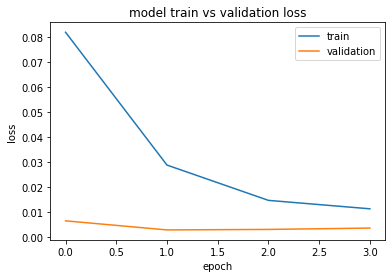

In [112]:

plt.plot(multi_step_history.history['loss'])
plt.plot(multi_step_history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Prediction

In [126]:
test_data = hourly_df_test.values

shx_train_uni, shy_train_uni = univariate_data(train_dataset, TESTSET_HORIZION, train_dataset.shape[1])

train_data_reshaped = shx_train_uni.reshape(shx_train_uni.shape[0], shx_train_uni.shape[1],1)

# val (25, 220)
batch_number=int(np.floor(len(train_data_shifted) / float(BATCH_SIZE)))
predicted = []
current_index = BATCH_SIZE
start_index = 0
for batch in range(0, batch_number):
    predicted.extend(multi_step_model.predict(train_data_reshaped[start_index:current_index,:]))
    start_index = current_index
    current_index+= BATCH_SIZE
    
predicted

[array([ 2.39290623e-03,  1.04002580e-02,  3.90032940e-02,  1.15963689e-03,
        -1.30327903e-02, -9.43911436e-04,  8.22605006e-03,  4.84944368e-03,
         1.14156241e-02,  8.20295699e-03,  1.07107610e-02, -9.82055068e-03,
         2.63355137e-03,  1.79457534e-02,  2.03360571e-03,  7.43162353e-03,
        -8.17659684e-03,  1.37775233e-02,  5.54267503e-03,  1.61602627e-02,
        -1.57654583e-02,  1.57696847e-02,  3.71201569e-03,  8.18929542e-03,
        -1.02488594e-02, -4.05600807e-03, -4.51942487e-03,  3.76457209e-03,
        -1.21925967e-02, -1.46550545e-02,  1.30737005e-02, -1.20505579e-02,
         3.77131626e-03,  1.65000893e-02,  5.18732518e-03,  1.07813312e-03,
        -2.33937092e-02, -6.32207084e-05,  1.42836170e-02, -2.04873160e-02,
        -1.25219151e-02, -1.14296842e-03, -6.16526930e-03, -6.20887848e-03,
        -8.43230821e-03, -1.05895782e-02,  2.00194865e-02,  1.14525948e-02],
       dtype=float32),
 array([ 0.00166588,  0.00671262,  0.0256828 ,  0.00083511, -0.0

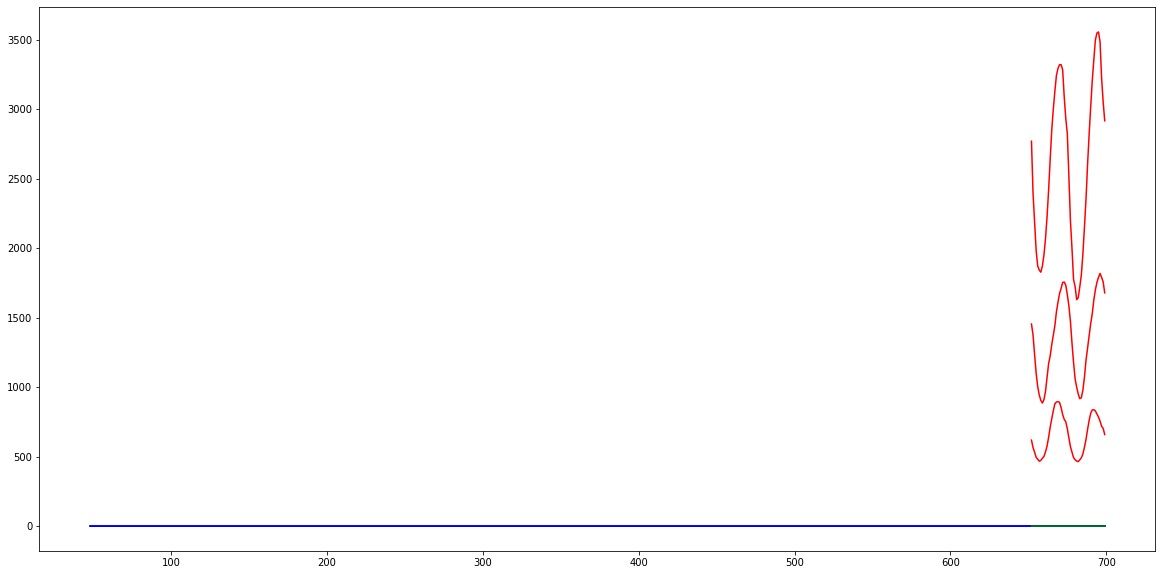

In [146]:


plt.figure(figsize=(20,10))

# plot the predition for one sample
for i in range(0, 3):
    
    time_steps_history = create_time_steps(TRAINSET_LOOK_BACK, start=TESTSET_HORIZION)
    time_steps_future  = create_time_steps(TESTSET_HORIZION , start=TRAINSET_LOOK_BACK)
    time_steps_pred    = create_time_steps(TESTSET_HORIZION , start=TRAINSET_LOOK_BACK)

    plt.plot(time_steps_history, shx_train_uni[i], '-', markersize=10, color = 'blue', label='History')
    plt.plot(time_steps_future , test_data[i] , '-', markersize=10, color = 'red' , label='True Future')
    plt.plot(time_steps_pred, predicted[i], '-', markersize=10, color = 'green', label='Model Prediction')



In [147]:
multi_step_model.evaluate(x_val_uni, y_val_uni, batch_size=BATCH_SIZE, verbose=0)

ValueError: Error when checking input: expected lstm_4_input to have 3 dimensions, but got array with shape (104, 652)